# import modules

In [11]:
import sys

sys.path.insert(0, "../")
from modules.Classes_ver1 import *
from modules.default_params_ver1 import *
from modules.functions_ver1 import *

# # after making changes to scripts, reload them
# import importlib

# import scripts.Classes_ver1
# importlib.reload(scripts.Classes_ver1)
# from scripts.Classes_ver1 import *

# import scripts.default_params_ver1
# importlib.reload(scripts.default_params_ver1)
# from scripts.default_params_ver1 import *

# import scripts.functions_ver1
# importlib.reload(scripts.functions_ver1)
# from scripts.functions_ver1 import *

# assign params

default: mcz = 20 solar masses, MLz = 2000 solar masses

In [12]:
# lens_params_1, RP_params_1, NP_params_1 = set_to_location(loc_params['sys1']['edgeon'], lens_params_0, RP_params_0, NP_params_0)
# lens_params_1["mcz"] = RP_params_1["mcz"] = NP_params_1["mcz"] = 20 * solar_mass
# lens_params_1["MLz"] = 2000 * solar_mass
# lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

In [13]:
test_loc_params = {
    "phi_S": np.pi / 4,
    "theta_S": np.pi / 2,
    "phi_J": np.pi / 3,
    "theta_J": np.pi / 6,
}
print(
    cos_i_JN(
        test_loc_params["phi_S"],
        test_loc_params["theta_S"],
        test_loc_params["phi_J"],
        test_loc_params["theta_J"],
    )
)

lens_params_1, RP_params_1, NP_params_1 = set_to_location(
    test_loc_params, lens_params_0, RP_params_0, NP_params_0
)
lens_params_1["mcz"] = RP_params_1["mcz"] = NP_params_1["mcz"] = 20 * solar_mass
lens_params_1["MLz"] = 2000 * solar_mass
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

order of arguments: phi_S, theta_S, phi_J, theta_J
0.48296291314453416


# define plotting functions

In [14]:
# plot contour of mismatch between RP & L as a function of omega_tilde and theta_tilde


def mismatch_contour(
    cmd, l_params, rp_params, np_params, lens_Class=LensingGeo, prec_Class=Precessing
):
    n_pts = 40
    omega_tilde_arr = np.linspace(0, 3, n_pts)
    theta_tilde_arr = np.linspace(0, 8, n_pts)
    X, Y = np.meshgrid(omega_tilde_arr, theta_tilde_arr)
    Z = np.zeros_like(X)
    g_min_matrix = np.zeros_like(X)

    for r in range(n_pts):
        for c in range(n_pts):
            rp_params["omega_tilde"] = X[r, c]
            rp_params["theta_tilde"] = Y[r, c]

            optimized_mismatch = optimize_mismatch_gammaP(
                cmd, l_params, rp_params, np_params, lens_Class, prec_Class
            )

            Z[r, c] = optimized_mismatch["ep_min"]
            g_min_matrix[r, c] = optimized_mismatch["g_min"]

    # print mismatch at the bottom left corner
    print("mismatch at bottom left corner = {:.3g}".format(Z[0, 0]))

    # print coordinates where mismatch is min
    min_idx = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
    print("min mismatch = {:.3g}".format(Z[min_idx]))
    print("min omega_tilde = {:.3g}".format(X[min_idx]))
    print("min theta_tilde = {:.3g}".format(Y[min_idx]))
    print("min gamma_P = {:.3g}".format(g_min_matrix[min_idx]))

    # print coordinates where mismatch is max
    max_idx = np.unravel_index(np.argmax(Z, axis=None), Z.shape)
    print("max mismatch = {:.3g}".format(Z[max_idx]))
    print("max omega_tilde = {:.3g}".format(X[max_idx]))
    print("max theta_tilde = {:.3g}".format(Y[max_idx]))
    print("max gamma_P = {:.3g}".format(g_min_matrix[max_idx]))

    # remember and coordinates where mismatch satisfies condition
    idx = np.where(Z <= 0.025)
    min_mismatch_dict = {
        "mismatch": Z[idx],
        "omega_tilde": X[idx],
        "theta_tilde": Y[idx],
        "gamma_P": g_min_matrix[idx],
    }
    idx = np.where(Z >= 0.27)
    max_mismatch_dict = {
        "mismatch": Z[idx],
        "omega_tilde": X[idx],
        "theta_tilde": Y[idx],
        "gamma_P": g_min_matrix[idx],
    }

    plt.contourf(X, Y, Z, levels=60, cmap="jet")
    plt.xlabel(r"$\tilde{\Omega}$", fontsize=14)
    plt.ylabel(r"$\tilde{\theta}$", fontsize=14)

    if cmd in ["L & RP", "RP & L"]:
        plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
            label=r"$\epsilon(\~h_{\rm P}, \~h_{\rm L})$", size=14
        )

    plt.suptitle(
        "Mismatch Between RP Waveforms and a Lensed Waveform",
        fontsize=16,
        y=1.0215,
        x=0.435,
    )

    plt.title(
        r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, $M_L$ = {:.4g} {}, $y$ = {:.3g}, {} = {:.3g} {}".format(
            r"$\pi/2$",
            r"$\pi/4$",
            r"$\pi/6$",
            r"$\pi/3$",
            l_params["MLz"] / solar_mass,
            r"$M_{\odot}$",
            l_params["y"],
            r"$m_{cz}$",
            l_params["mcz"] / solar_mass,
            r"$M_{\odot}$",
        ),
        fontsize=12,
        y=1.021,
    )

    return min_mismatch_dict, max_mismatch_dict

# mismatch between RP & L with L fixed

mismatch at bottom left corner = 0.275
min mismatch = 0.0241
min omega_tilde = 1.17
min theta_tilde = 5.97
min gamma_P = 1.59
max mismatch = 0.275
max omega_tilde = 0
max theta_tilde = 0


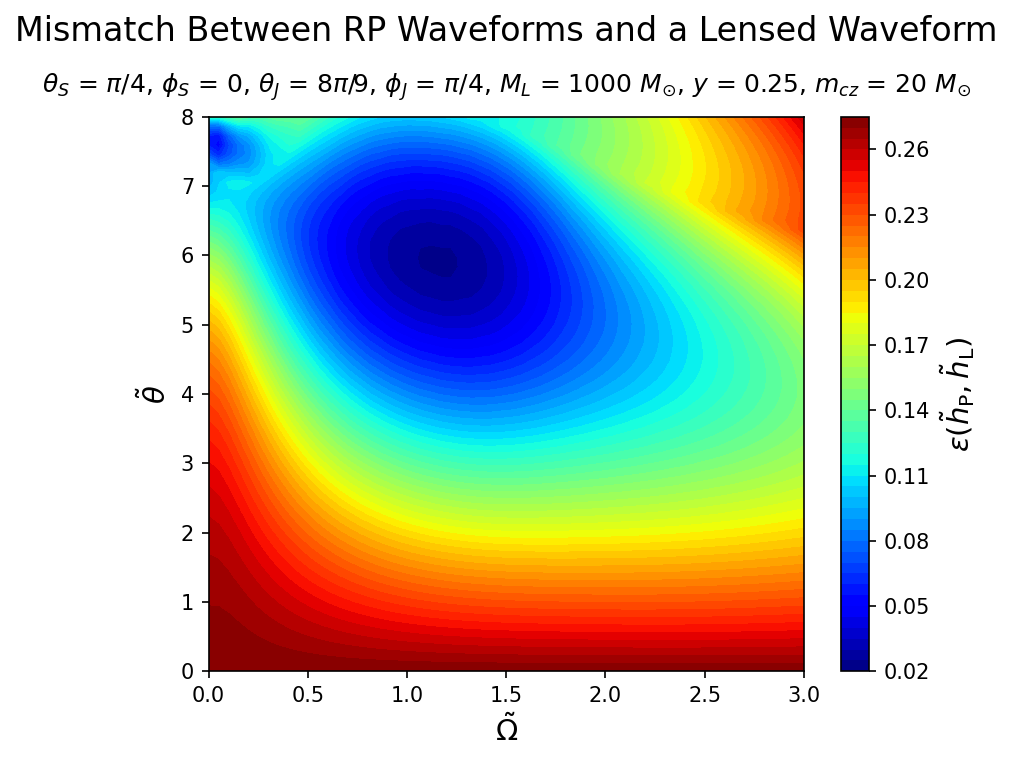

In [134]:
mismatch_contour("RP & L", lens_params, RP_params, NP_params)

mismatch at bottom left corner = 0.232
min mismatch = 0.0527
min omega_tilde = 2.23
min theta_tilde = 8
min gamma_P = 4.82
max mismatch = 0.232
max omega_tilde = 0
max theta_tilde = 0
max gamma_P = 0


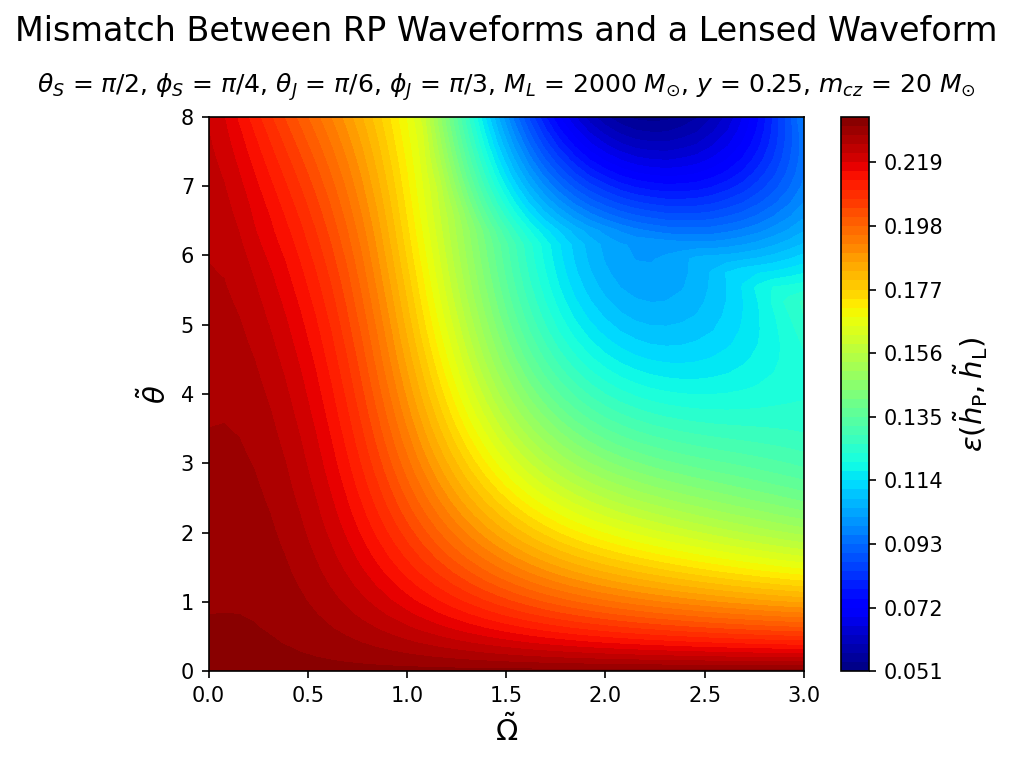

In [16]:
min_ep_dict, max_ep_dict = mismatch_contour("RP & L", lens_params, RP_params, NP_params)

/Users/fairytien/Google Drive (fairynguyen33@gmail.com)/TEXAS Bridge Program 2023-2024/code/Tien's/scripts/Classes_ver1.py:386: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


mismatch at bottom left corner = 0.232
min mismatch = 0.0648
min omega_tilde = 3
min theta_tilde = 2.67
min gamma_P = 0.444
max mismatch = 0.232
max omega_tilde = 0
max theta_tilde = 0
max gamma_P = 0


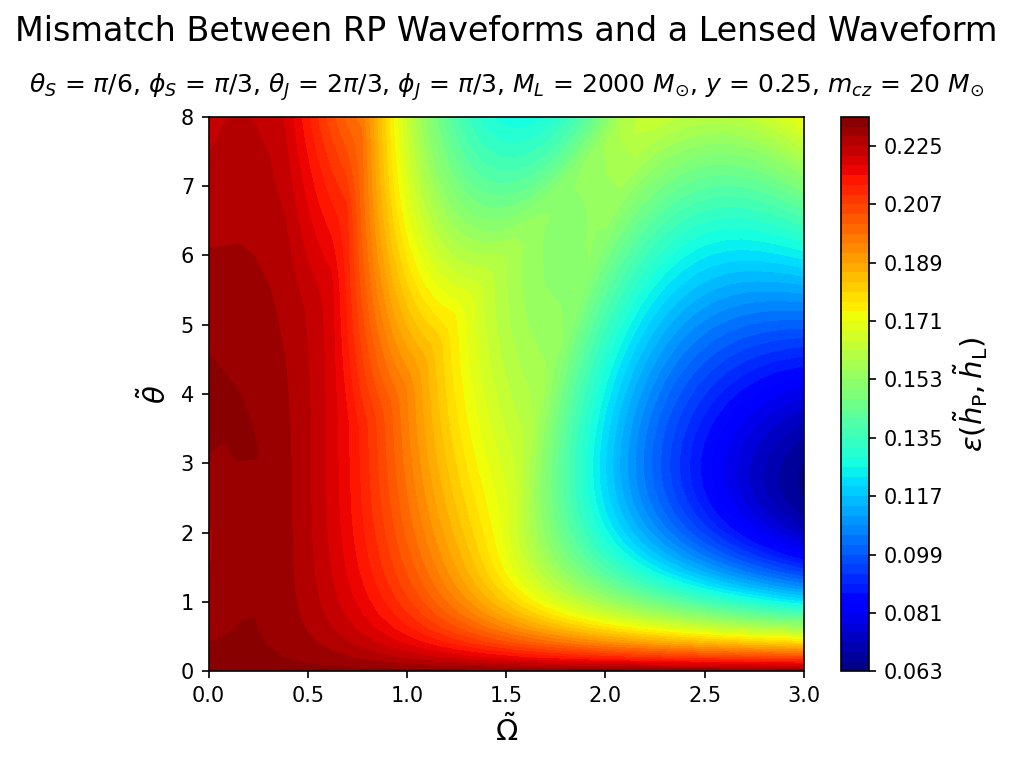

In [8]:
min_ep_dict, max_ep_dict = mismatch_contour("RP & L", lens_params, RP_params, NP_params)